In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.linalg import inv
import pandas as pd
np.random.seed(1234)

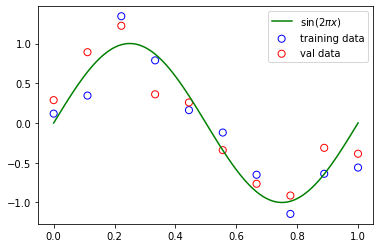

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="val data")

plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [3]:
class LinearRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def add_predict_column(self):
        newdf = self.df.copy()
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        w = self.find_coefficient()
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf
    def mse(self):
        newdf = self.add_predict_column()
        return np.mean((newdf['predict'] - newdf[self.target]) ** 2)

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w = self.find_coefficient()
        return array.dot(w[1:,]) + w[0]

    def print_model(self):
        feature = (self.df.loc[:, self.df.columns != self.target])
        w = self.find_coefficient()
        print('y =', end=' ')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),2), feature.columns[i-1], '+', end=' ')
        print(round(float(w[0][0]),2))

In [4]:
dict1 = {'x_train':x_train, 'y_train' :y_train}
train_df = pd.DataFrame(dict1)
train_df.head()

,x_train,y_train
0,0.000000,0.117859
1,0.111111,0.345044
2,0.222222,1.342984
3,0.333333,0.787862
4,0.444444,0.161873


In [5]:
dict2 = {'x_val':x_val, 'y_val' :y_val}
val_df = pd.DataFrame(dict2)
val_df.head()

,x_val,y_val
0,0.000000,0.287509
1,0.111111,0.890774
2,0.222222,1.223139
3,0.333333,0.360712
4,0.444444,0.258501


In [6]:
dict3 = {'x_test':x_test, 'y_test' :y_test}
test_df = pd.DataFrame(dict3)
test_df.head()

,x_test,y_test
0,0.000000,0.000000
1,0.010101,0.063424
2,0.020202,0.126592
3,0.030303,0.189251
4,0.040404,0.251148


In [7]:
# bac 9
train_df9 = train_df.copy()
train_df9['x^2'] = x_train ** 2
train_df9['x^3'] = x_train ** 3
train_df9['x^4'] = x_train ** 4
train_df9['x^5'] = x_train ** 5
train_df9['x^6'] = x_train ** 6
train_df9['x^7'] = x_train ** 7
train_df9['x^8'] = x_train ** 8
train_df9['x^9'] = x_train ** 9

train_df9.head()

,x_train,y_train,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9
0,0.000000,0.117859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.111111,0.345044,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09
2,0.222222,1.342984,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,1.321561e-06
3,0.333333,0.787862,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05
4,0.444444,0.161873,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,6.766395e-04


In [8]:
model9 = LinearRegression(train_df9,'y_train')
print(model9.find_coefficient())
model9.print_model()

[[ 1.18058317e-01]
 [-3.22288205e+01]
 [ 5.52497345e+02]
 [-2.72786818e+03]
 [ 4.75952520e+03]
 [ 2.04005682e+03]
 [-1.93737482e+04]
 [ 2.83961336e+04]
 [-1.78633565e+04]
 [ 4.24830973e+03]]
y = -32.23 x_train + 552.5 x^2 + -2727.87 x^3 + 4759.53 x^4 + 2040.06 x^5 + -19373.75 x^6 + 28396.13 x^7 + -17863.36 x^8 + 4248.31 x^9 + 0.12


In [9]:
w9= model9.find_coefficient()
x9 = np.linspace(0,1,100)
y9 = w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3 + w9[4]*x9**4 + w9[5]*x9**5 + w9[6]*x9**6  + w9[7]*x9**7 + w9[8]*x9**8 + w9[9]*x9**9 + w9[0]

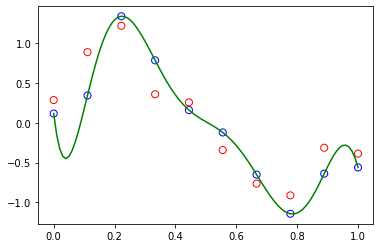

In [10]:
model9_predict = model9.add_predict_column()
plt.scatter(x_train,y_train, facecolor="none", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="val data")
plt.plot(x9, y9,'g')

In [11]:
def mse(truth, predict):
    truth = np.array(truth)
    predict = np.array(predict)
    return np.mean((truth - predict) ** 2)

In [12]:
print('MSE Training:',mse(y_train, model9_predict.predict))
print('MSE Validation:',mse(y_val, model9_predict.predict))

MSE Training: 2.1096325143732538e-08
MSE Validation: 0.07850059317862015


In [13]:
### L2:
def L2(X, y, alpha, lamda_value, interations):
  m = X.shape[0]
  n = X.shape[1]
  X = np.concatenate((np.ones(X.shape[0], 1), X), axis = 1)
  w = np.random.rand(n+1, )
  J_hist = []
  w_hist = []
  for i in interations:
    y_hat = np.dot(X, w)
    e = y_hat - y
    l2 = (1/ 2* m) * np.sum(e ** 2) + lambda_value * np.sum(w ** 2)
    J_hist.append(l2)
    w_1  =np.linalg.pinv(np.dot(X.T, X) + lambda_value * I) 
    w_2 = np.dot(X.T, y)
    w = np.dot(w_1,w_2)
    w_hist.append(w)
  return w_hist, J_hist